In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 原圖
im = cv2.imread('test1.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY).astype(np.float64)
# im_modify = cv2.convertScaleAbs(im, alpha=4, beta=0)
im = cv2.resize(im, (100, 100))
im_modify = im
im.shape

(100, 100)

#### 顯示圖片

In [3]:
def show_img(np_array):
    plt.imshow(np_array, cmap='gray')
    plt.colorbar()  
    plt.show()
    
    

##### 找高頻率區

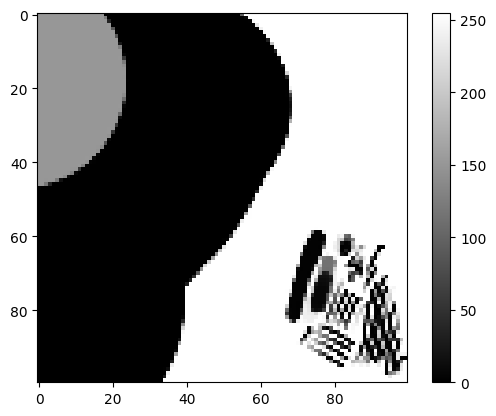

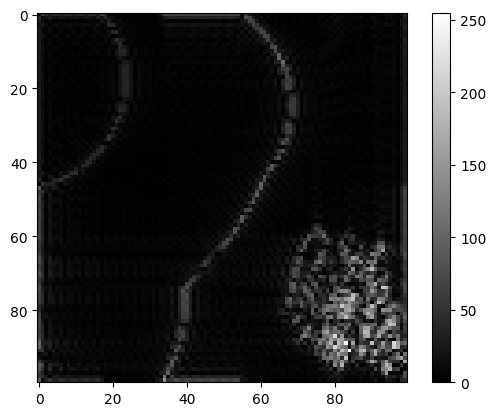

In [4]:
# 執行傅立葉變換
f_transform = np.fft.fft2(im)
f_transform_shifted = np.fft.fftshift(f_transform)

# 創建高通濾波器（適當調整閾值以過濾不同頻率）
rows, cols = im.shape
crow, ccol = rows // 2, cols // 2
f_transform_shifted[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0

# 執行傅立葉逆變換
f_transform_shifted = np.fft.ifftshift(f_transform_shifted)
image_filtered = np.fft.ifft2(f_transform_shifted)
image_filtered = np.abs(image_filtered)

# 將結果轉換為 8 位灰度圖像
image_filtered = cv2.normalize(image_filtered, None, 0, 255, cv2.NORM_MINMAX)
image_filtered = np.uint8(image_filtered)

# 顯示原始圖片和高頻率區域
show_img(im)
show_img(image_filtered)


### 算p mod

#### Rx1 Rx0計算function

In [5]:
def Rx0(input_list):
    sum = 0
    for x in input_list:
        sum = sum + (x ** 2)
    
    return sum

def Rx1(input_list):
    sum = 0
    for x in range(len(input_list) - 1):
        sum = sum + input_list[x]*input_list[x+1]
    
    return sum


#### 計算整張圖參數

In [6]:
x_range = 100
y_range = 100
# d=4
# u=5
d = 2
u = 3
delta = 0

#### pmod_x

In [7]:
# x correlate

def pmod_x(Rxx_x, Rx0x, Rx1x, x_range, y_range,d ,u, delta, im):
    for m in range(y_range):

        Rxx_tmp = []
        Rx0x_tmp = []
        Rx1x_tmp = []

        for count in range(x_range):

            tmp = []
            down = count-d
            up = count+u

            for n in range(down,up):
                if n >= 0 and n < x_range:
                    tmp.append(im[m,n])
                    
            tmp_avg=tmp-np.mean(tmp)

            Rx0_tmp = Rx0(tmp_avg)
            Rx1_tmp = Rx1(tmp_avg)
            Rx0x_tmp.append(Rx0_tmp)
            Rx1x_tmp.append(Rx1_tmp)
            Rxx_tmp.append(Rx1_tmp/(Rx0_tmp-delta))#


        Rxx_x.append(Rxx_tmp)
        Rx0x.append(Rx0x_tmp)
        Rx1x.append(Rx1x_tmp)


#len(correlate)


In [8]:
Rxx_x = []
Rx0x = []
Rx1x = []
pmod_x(Rxx_x, Rx0x, Rx1x, x_range, y_range,d ,u, delta, im_modify)

/var/folders/jz/3snzd34969d0rkfp2lmgmc8m0000gn/T/ipykernel_53713/3314218311.py:26: RuntimeWarning: invalid value encountered in scalar divide
  Rxx_tmp.append(Rx1_tmp/(Rx0_tmp-delta))#


#### pmod_y

In [9]:
# y correlate

Rxx_y = []
Rx0y = []
Rx1y = []

def pmod_y(Rxx_y, Rx0y, Rx1y, x_range, y_range,d ,u, delta, im):
    for m in range(x_range):

        Rxx_tmp = []
        Rx0y_tmp = []
        Rx1y_tmp = []

        for count in range(y_range):

            tmp = []
            down = count-d
            up = count+u

            for n in range(down,up):
                if n >= 0 and n < y_range:
                    tmp.append(im[n,m])
                    
            tmp_avg=tmp-np.mean(tmp)

            Rx0_tmp = Rx0(tmp_avg)
            Rx1_tmp = Rx1(tmp_avg)
            Rx0y_tmp.append(Rx0_tmp)
            Rx1y_tmp.append(Rx1_tmp)
            Rxx_tmp.append(Rx1_tmp/(Rx0_tmp-delta))#


        Rxx_y.append(Rxx_tmp)
        Rx0y.append(Rx0y_tmp)
        Rx1y.append(Rx1y_tmp)


#len(correlate)


In [10]:
Rxx_y = []
Rx0y = []
Rx1y = []
pmod_y(Rxx_y, Rx0y, Rx1y, x_range, y_range,d ,u, delta, im_modify)

/var/folders/jz/3snzd34969d0rkfp2lmgmc8m0000gn/T/ipykernel_53713/2698117418.py:30: RuntimeWarning: invalid value encountered in scalar divide
  Rxx_tmp.append(Rx1_tmp/(Rx0_tmp-delta))#


#### Rx0 Rx0 Rxx 轉nparray

In [11]:
Rxx_x = np.array(Rxx_x)
Rx0x = np.array(Rx0x)
Rx1x = np.array(Rx1x)

print(np.mean(Rx0x))
print(np.mean(Rx1x))


Rxx_y = np.array(Rxx_y)
Rxx_y = np.transpose(Rxx_y)
Rx0y = np.array(Rx0y)
Rx0y = np.transpose(Rx0y)
Rx1y = np.array(Rx1y)
Rx1y = np.transpose(Rx1y)



6870.051695115927
540.157412413508


#### Rx0x Rx1x Rxx_x 整張圖結果

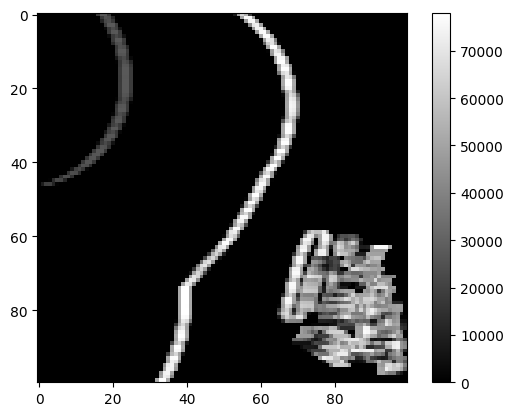

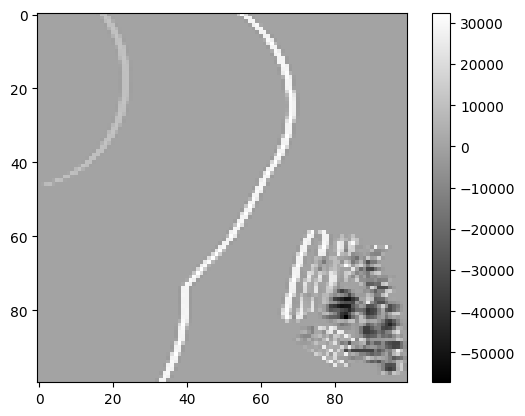

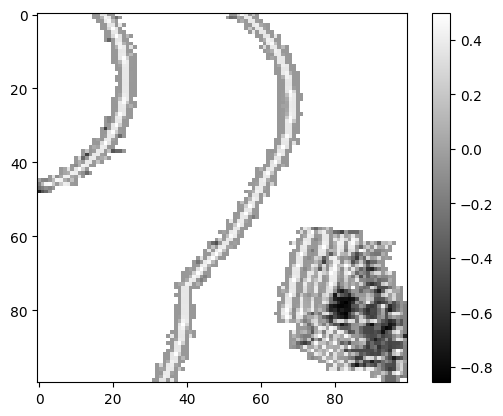

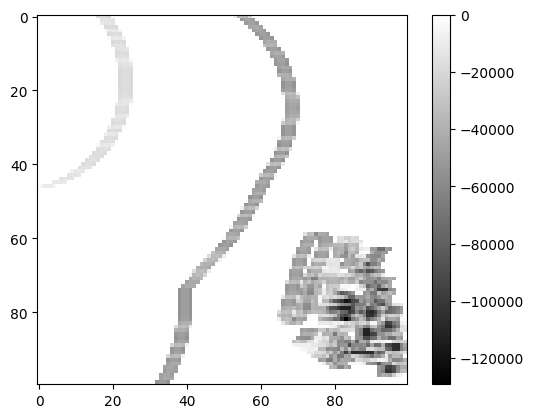

In [12]:
show_img(Rx0x)
show_img(Rx1x)
show_img(Rxx_x)
diff=Rx1x-Rx0x
show_img(diff)

### LPF 實驗

In [13]:
# afterLPF = im.copy()
# x1, y1 = 0, 0  # 左上角坐标
# x2, y2 = 6, 6  # 右下角坐标
# roi = im[y1:y2, x1:x2]
# # 在ROI上应用滤波器，这里以均值滤波为例
# filtered_roi = cv2.GaussianBlur(roi, (5, 5), 1)
# # 将滤波后的ROI放回原始图像
# afterLPF[y1:y2, x1:x2] = filtered_roi

### 方法一

In [14]:
# new_im = im.copy()
# for m in range(y_range):
#     for n in range(x_range):
#         if Rxx_x[m,n]>0.3:#可改
#             tmp = np.zeros((9, 9))
#             y1, y2 = m-4, m+5
#             x1, x2 = n-4, n+5
#             #取出原圖的部分範圍
#             for a in range(y1,y2):
#                 for b in range(x1,x2):
#                     #print(a,b)
#                     if a >= 0 and b >= 0 and a < y_range and b < x_range:
#                         tmp[a+4-m,b+4-n]=im[a, b]
#             #濾波
#             filtered_roi = cv2.GaussianBlur(roi, (3, 3), 3)
#             center = filtered_roi[4,4]
#             new_im[m,n]=(im[m,n]+center)/2

#         # print(tmp)
#         # print('---------------------')

                        
            


### 方法二

#### 整張圖片LPF

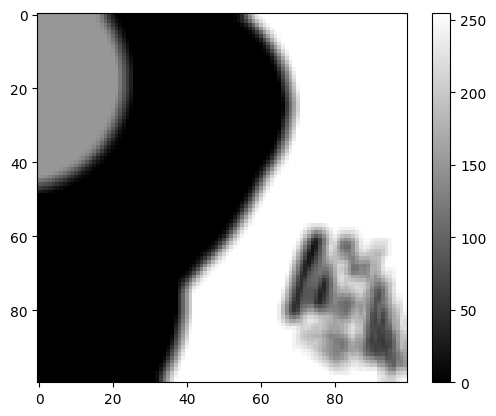

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
new_im = im.copy()
new_im = new_im.astype(np.float64)
#LPF = cv2.GaussianBlur(im, (5, 5), 1).astype(np.float64)
LPF = cv2.blur(im, (5, 5), 1).astype(np.float64)
show_img(LPF)
print(type(new_im))
print(type(LPF))


           

### 根據pmod處理圖片

In [16]:

for m in range(y_range):
    for n in range(x_range):
        if Rxx_x[m,n]>0 or Rxx_y[m,n]>0:#可改
            new_im[m,n]=(im[m,n]+LPF[m,n])/2

### 圖

In [17]:
# 壓縮後的圖
cv2.imwrite('compression.jpg', im, [cv2.IMWRITE_JPEG_QUALITY, 50])  # 存成 jpg
compression = cv2.imread('compression.jpg')
compression = cv2.cvtColor(compression, cv2.COLOR_BGR2GRAY).astype(np.float64)
# pmod後壓縮後的圖
cv2.imwrite('compression after pmod.jpg', new_im, [cv2.IMWRITE_JPEG_QUALITY, 50])  # 存成 jpg
compression_pmod = cv2.imread('compression after pmod.jpg')
compression_pmod = cv2.cvtColor(compression_pmod, cv2.COLOR_BGR2GRAY).astype(np.float64)
# LPF的圖
cv2.imwrite('compression after LPF.jpg', LPF, [cv2.IMWRITE_JPEG_QUALITY, 50])  # 存成 jpg
compression_LPF = cv2.imread('compression after LPF.jpg')
compression_LPF = cv2.cvtColor(compression_LPF, cv2.COLOR_BGR2GRAY).astype(np.float64)


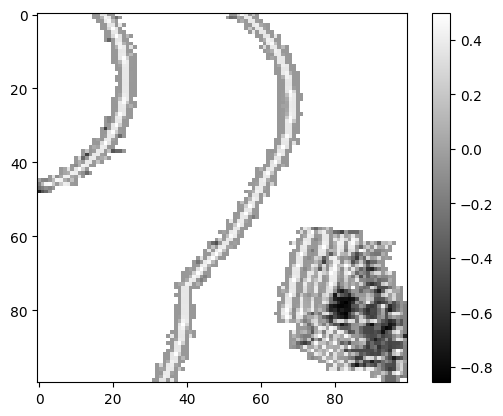

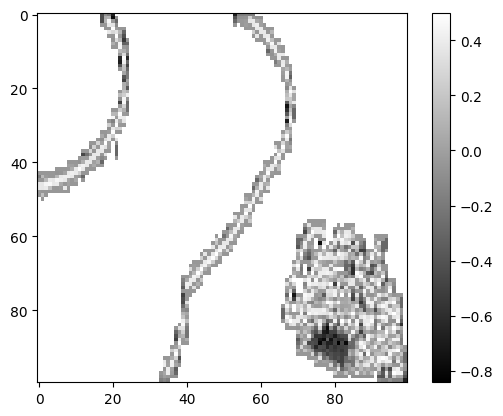

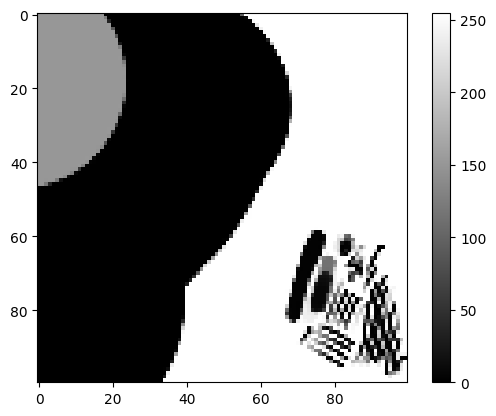

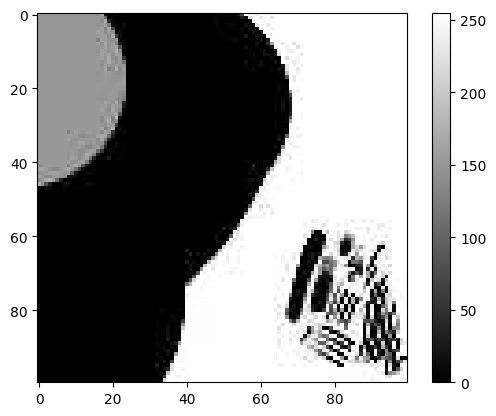

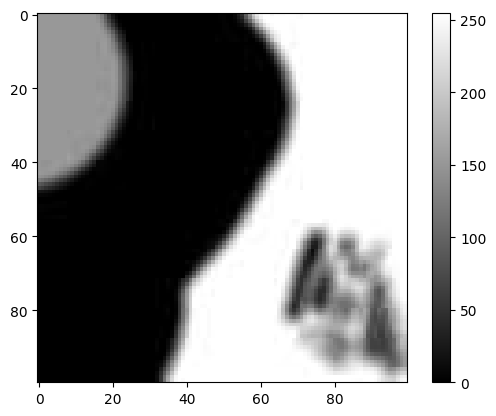

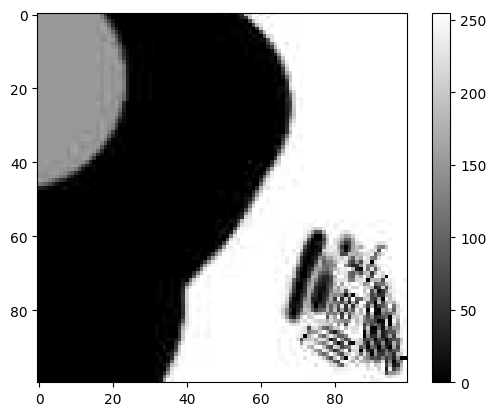

In [18]:
# p mod 圖 (x)
# p mod 代表易失真(邊界處)
show_img(Rxx_x)
# p mod 圖 (y)
# p mod 代表易失真(邊界處)
show_img(Rxx_y)
#原圖
show_img(im)
#壓縮後的圖
show_img(compression)
# 濾波壓縮後的圖
show_img(compression_LPF)
# pmod壓縮後的圖
show_img(compression_pmod)